In [1]:
!pip install -Uqq fastai

In [3]:
!wget https://lp-prod-resources.s3-us-west-2.amazonaws.com/other/Deploying+a+Deep+Learning+Model+on+Web+and+Mobile+Applications+Using+TensorFlow/Food+101+-+Data+Subset.zip
!unzip Food+101+-+Data+Subset.zip

--2021-04-04 08:50:08--  https://lp-prod-resources.s3-us-west-2.amazonaws.com/other/Deploying+a+Deep+Learning+Model+on+Web+and+Mobile+Applications+Using+TensorFlow/Food+101+-+Data+Subset.zip
Resolving lp-prod-resources.s3-us-west-2.amazonaws.com (lp-prod-resources.s3-us-west-2.amazonaws.com)... 52.218.217.193
Connecting to lp-prod-resources.s3-us-west-2.amazonaws.com (lp-prod-resources.s3-us-west-2.amazonaws.com)|52.218.217.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153668842 (147M) [application/zip]
Saving to: ‘Food+101+-+Data+Subset.zip.1’

Food+101+-+Data+Sub 100%[===================>] 146.55M  12.3MB/s    in 14s     

2021-04-04 08:50:23 (10.7 MB/s) - ‘Food+101+-+Data+Subset.zip.1’ saved [153668842/153668842]

Archive:  Food+101+-+Data+Subset.zip
   creating: food-101-subset/
  inflating: __MACOSX/._food-101-subset  
  inflating: food-101-subset/.DS_Store  
  inflating: __MACOSX/food-101-subset/._.DS_Store  
   creating: food-101-subset/images/
  

In [4]:
!mv food-101-subset/images/ .

In [2]:
from fastai.vision.all import *

In [3]:
path = Path('images')

In [4]:
path.ls()

(#4) [Path('images/.DS_Store'),Path('images/falafel'),Path('images/apple_pie'),Path('images/caesar_salad')]

In [5]:
files = get_image_files(path)

In [20]:
food = DataBlock(
          blocks=(ImageBlock,CategoryBlock),
          get_items= get_image_files,
          splitter=RandomSplitter(valid_pct=0.2,seed=42),
          get_y=parent_label,
          item_tfms=RandomResizedCrop(224, min_scale=0.5),
           batch_tfms=[*aug_transforms(),
                    Normalize.from_stats(*imagenet_stats)])

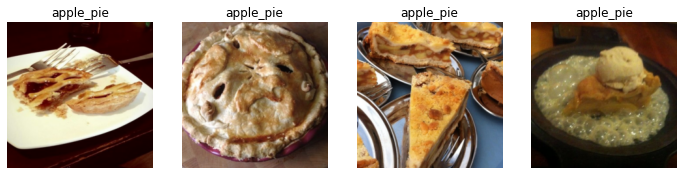

In [21]:
dls = food.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [23]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.755900,0.603162,0.865000,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.404736,0.386425,0.895000,00:18
1,0.280925,0.264134,0.920000,00:18
2,0.186853,0.220472,0.930000,00:18
3,0.121108,0.199893,0.933333,00:18


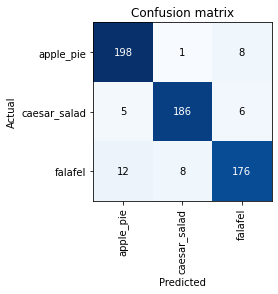

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [28]:
learn.export('initial_model.pkl')

In [29]:
import torchvision.models as models
model = models.mobilenet_v2

In [32]:
learn = cnn_learner(dls, models.mobilenet_v2, cut=-1,metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.690046,0.493614,0.888333,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.347422,0.443856,0.896667,00:09
1,0.351350,0.393748,0.896667,00:09
2,0.279509,0.334029,0.908333,00:09
3,0.211081,0.322052,0.901667,00:09


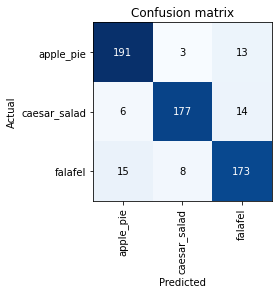

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [34]:
learn.export('mobilenet.pkl')